In [2]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [3]:
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit, Aer, execute
import numpy as np
from qiskit.visualization import plot_state_qsphere

In [4]:
def phase_oracle(n, indices_to_mark, name = 'Oracle'):
    
    # create a qAertum circuit on n qubits
    qc = QuantumCircuit(n, name=name)

    
    
    oracle_matrix = np.identity(2**n)
    
    for i in indices_to_mark:
        oracle_matrix[i][i] = -1
    
    

    # convert your matrix (called oracle_matrix) into an operator, and add it to the quantum circuit
    qc.unitary(Operator(oracle_matrix), range(n))
    
    return qc

In [5]:
def diffuser(n):
    
    # create a quantum circuit on n qubits
    qc = QuantumCircuit(n, name='Diffuser')
    
    
    
    qc.h(range(n))
    qc.append(phase_oracle(n, [0]), range(n))
    qc.h(range(n))
    
    
    
    return qc

In [6]:
def simulate_and_display(qc, step, it):
    sim = Aer.get_backend('statevector_simulator')
    res = execute(qc, backend=sim, shots=1).result()
    display(plot_state_qsphere(res.get_statevector(qc)))#.savefig(('./pics/out_'+step+it+'.png'))

5 qubits, basis states [2, 28] marked, 3 rounds


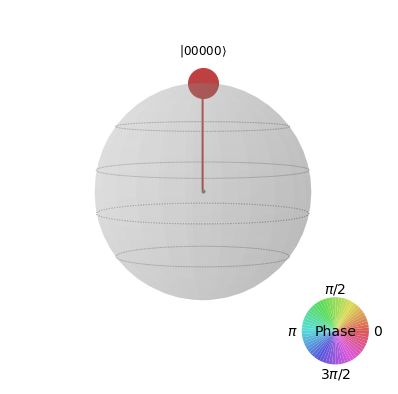

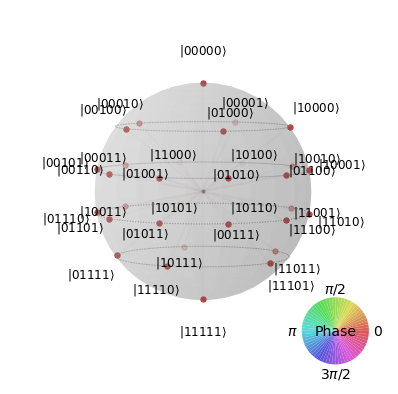

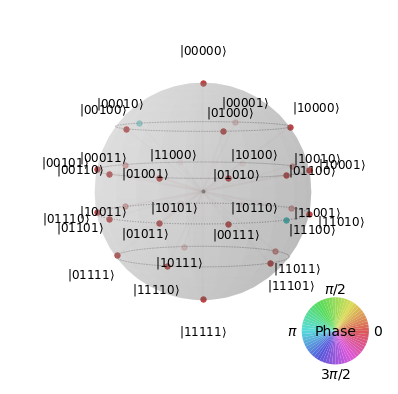

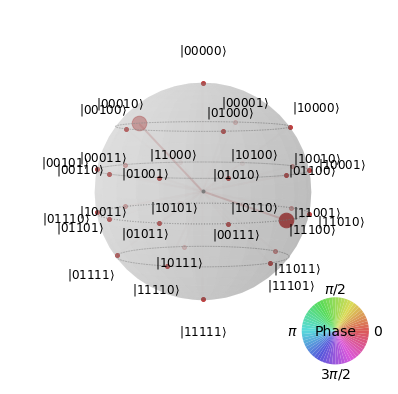

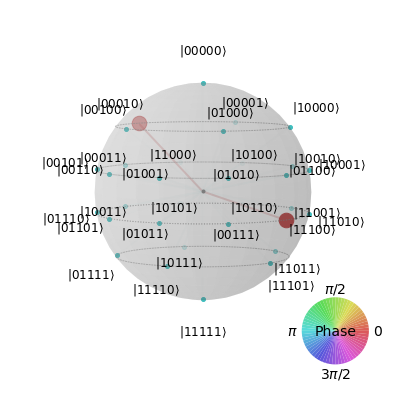

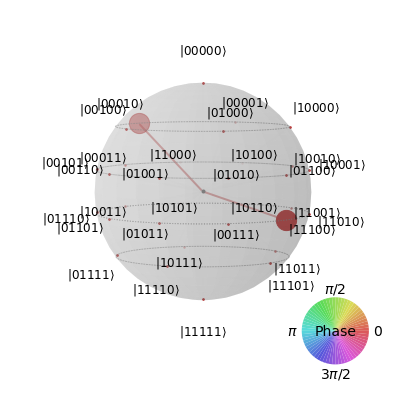

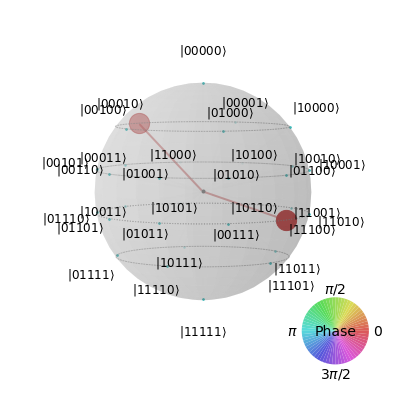

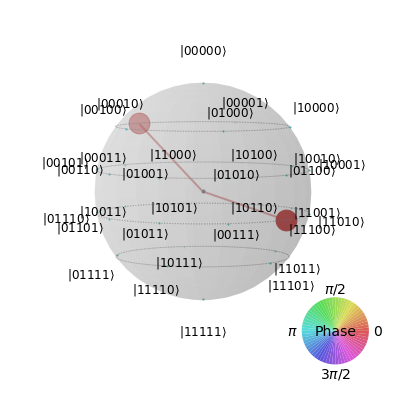

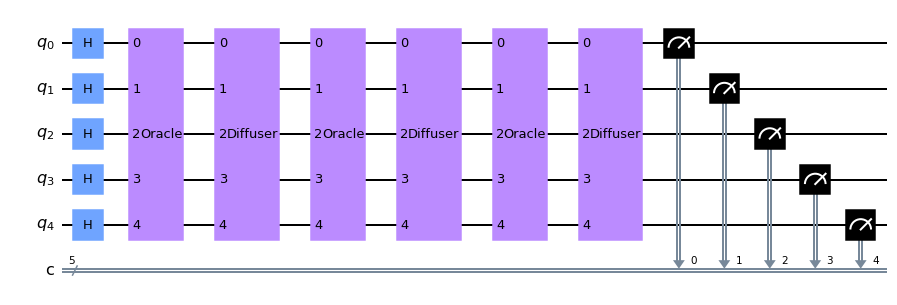

In [7]:
def Grover(n, indices_of_marked_elements):
    
    # Create a quantum circuit on n qubits
    qc = QuantumCircuit(n, n)
    
    # Determine r
    r = int(np.floor(np.pi/4*np.sqrt(2**n/len(indices_of_marked_elements))))
    print(f'{n} qubits, basis states {indices_of_marked_elements} marked, {r} rounds')
    
    # Display the initial state
    simulate_and_display(qc, 'init', '0')
    
    # step 1: apply Hadamard gates on all qubits
    qc.h(range(n))
    simulate_and_display(qc, 'hadamard', '0')
    
    # step 2: apply r rounds of the phase oracle and the diffuser
    for it in range(r):
        qc.append(phase_oracle(n, indices_of_marked_elements), range(n))
        simulate_and_display(qc, 'oracle', str(it))
        qc.append(diffuser(n), range(n))
        simulate_and_display(qc, 'diff', str(it))
        
    # step 3: measure all qubits
    qc.measure(range(n), range(n))
  
    return qc

mycircuit = Grover(5, [2, 28])
mycircuit.draw(output='mpl')

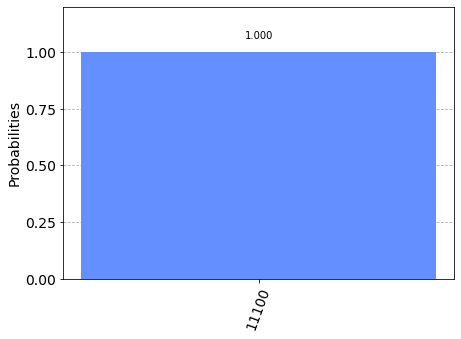

In [8]:
from qiskit import Aer, execute
simulator = Aer.get_backend('statevector_simulator')
counts = execute(mycircuit, backend=simulator, shots=1024).result().get_counts(mycircuit)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [ ]:
from qiskit.tools.monitor import job_monitor

device = provider.get_backend('ibmq_lima')
job = execute(mycircuit, backend=device, shots=8192)
job_monitor(job)

Job Status: job is actively running

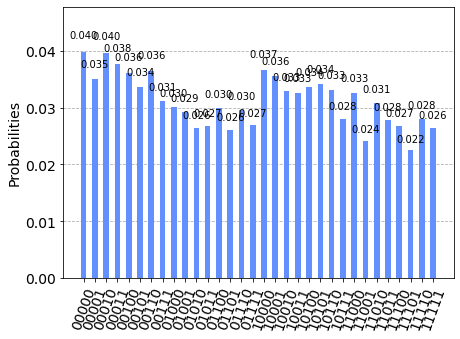

In [37]:
from qiskit.visualization import plot_histogram

result = job.result()
plot_histogram(result.get_counts(mycircuit))